# 7. Transformadas Discreta (DFT) y Rápida de Fourier (FFT)

En los capítulos anteriores se estudiaron las técnicas de diseño e implementación de filtros digitales FIR e IIR, los cuales pueden aplicarse a un gran número de aplicaciones. Sin embargo, para ciertas aplicaciones, resulta conveniente emplear estos filtros en combinación con alguna transformada de la señal de entrada. Estas transformadas se estudiarán en este y posteriores capítulos.

En este capítulo nos enfocaremos al estudio de la transformada más popular, la **Transformada Rápida de Fourier** o **FFT** (_Fast Fourier Transform_). Aunque la FFT es realmente un algoritmo eficiente de cómputo de la Transformada Discreta de Fourier (DFT), a lo largo de los años se ha popularizado tanto el uso del término FFT, que se suele emplear FFT para referirse a la DFT. Por esta razón, es importante conocer en que consiste la DFT y sus propiedades, ya que son las mismas de la FFT.

## 7.1. Transformada Discreta de Fourier (DFT)

En términos simples, la DFT no es más que la versión muestreada, $X[k]$, del espectro de una señal discreta, $X(\Omega)$, discretización que se expresa como:

$$X[k]=\left.X(\Omega)\right|_{\Omega=2\pi\frac{k}{N}}$$

siendo $N$ la longitud de la señal de entrada $x[n]$. Puede notarse que el eje de frecuencias en la DFT ya no toma como referencia la frecuencia normalizada, $\Omega$, sino la muestra de frecuencia $k$, que toma valores en el rango $0 \leq k \leq N-1$. Una importante consecuencia de la DFT lo constituye el hecho de que el vector de datos resultante de la transformación tendrá también $N$ muestras de frecuencia.

Es interesante notar que la región de frecuencias negativas $-\pi \leq \Omega \leq 0$, o, $-\pi \leq \Omega \leq 2\pi$, se mapea en el rango de $\frac{N}{2}\leq k\leq N-1$, es decir, $X[-k]=X[N-k]$. 

Ahora, si recordamos que $N$ está asociado a la frecuencia normalizada $\Omega=2\pi$, que a su vez es la frecuencia de muestreo $f_{s}$, tenemos que la máxima componente de frecuencia será la que tenga el índice $k=\frac{N}{2}$. Si hacemos la sustituciones pertinentes en la transformada de Fourier de una señal discreta (DFTF), tenemos las siguientes definiciones para la DFT y su inversa (IDFT):

$$X[k]=\sum_{n=0}^{N-1}x[n]\exp\left(-j2\pi\frac{kn}{N}\right)\,\,\,\,\,\,0\leq k\leq N-1$$

$$x[n]=\frac{1}{N}\sum_{k=0}^{N-1}X[k]\exp\left(j2\pi\frac{kn}{N}\right)\,\,\,\,\,\,0\leq n\leq N-1$$

Estas relaciones son idénticas a las de la serie discreta de Fourier, lo cual implica que la DFT asume en forma implícita una periodicidad de la señal a transformar, por lo tanto, la DFT calcula realmente la serie de Fourier de una señal que tiene un período $N$. 

En la siguiente figura se muestra como el espectro de la señal aperiódica $x[n]$ calculada con una DFT de $N=8$ puntos, es más cercano al espectro original, $X(\Omega)$. En cambio, si se hubiera usado una longitud de la señal de longitud $N=4$, como lo sugería a simple vista la forma de la señal original, la DFT nos conduciría a un resultado erróneo. Lo anterior significa que para el cálculo de la transformada de Fourier de una señal aperiódica, por medio una DFT, hay que tener la precaución de adicionar ceros a la derecha del arreglo de datos de entrada, con el fin de calcular la DFT con un mayor tamaño $N$. 

![Cálculo DFT](../img/cap7_dft.png)

_Ejemplo de cálculo de una DFT. En la parte superior se aprecia la forma de la señal aperiódica discreta y su respectiva transformada de Fourier de tiempo discreto (DTFT). En la parte central e inferior se muestran los resultados del cálculo de la DFT para la señal original usando N=4 (centro) y N=8 (parte inferior)._

Este efecto se aprecia mucho mejor en la siguiente animación donde el aumento del tamaño de la DFT, adicionando ceros (_zero padding_), produce un espectro de mejor calidad. De clic en ▷ y mueva el slider para cambiar el tamaño de la FFT. 

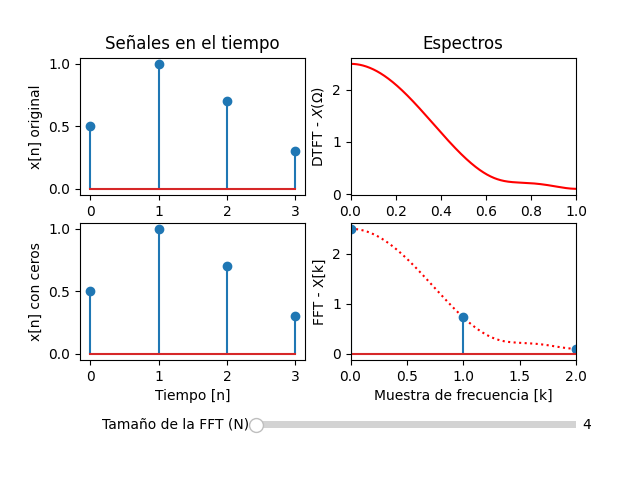

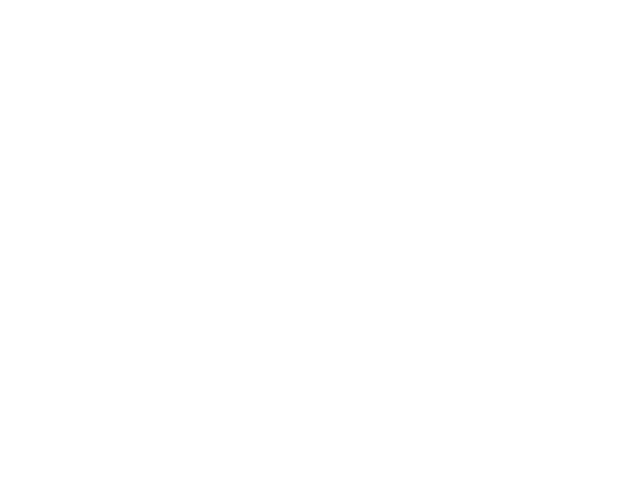

In [1]:
#Simulación del efecto de zero-padding sobre el espectro de la FFT
%matplotlib widget
%run cap7_fftzeropadding_anim.py

### 7.1.1. Cálculo de la DFT Inversa (IDFT)

Aunque las ecuaciones anteriores permiten establecer el algoritmo de cálculo de DFT y su inversa, puede verse que el mismo algoritmo para calcular la transformada directa sirve para el cálculo de la inversa, la única modificación está en el signo de la exponencial compleja. Además, puede verificarse que la IDFT puede calcularse a partir de una DFT, tomando la compleja conjugada de la transformada directa del conjugado de $x[n]$. Este principio se aplica en cálculo de la IDFT:

![Cálculo IDFT](../img/cap7_inv_fft.png)

$$x[n]=\frac{1}{N}\left[\left[\sum_{k=0}^{N-1}X[k]\exp(j2\pi\frac{kn}{N})\right]^{*}\right]^{*}=\frac{1}{N}\left[\sum_{k=0}^{N-1}X^{*}[k]\exp(-j2\pi\frac{kn}{N})\right]^{*}$$

$$x[n]=\frac{1}{N}DFT\left\{ \,X[k]^{*}\,\right\} ^{*}$$


### 7.1.2. Notación vectorial de la DFT

En las definiciones de la DFT y la IDFT es muy común hacer uso de la sustitución 

$$W_{N}=\exp\left(-j\frac{2\pi}{N}\right)$$

y repartir el término $\frac{1}{N}$, tanto en la transformada directa como en la inversa, con el fin de poder representar estas transformadas como una operación vectorial de la forma:

$$X[k]=\frac{1}{\sqrt{N}}\sum_{n=0}^{N-1}x[n]W_{N}^{kn}\,\,\,\,0\leq k\leq N-1\,\,\,\,\Rightarrow\,\,\,\,\mathbf{x}_{k}=\mathbf{W}_{N}\mathbf{x}_{n}$$

$$x[n]=\frac{1}{\sqrt{N}}\sum_{k=0}^{N-1}X[k]W_{N}^{-kn}\,\,\,\,0\leq n\leq N-1\,\,\,\,\Rightarrow\,\,\,\,\mathbf{x}_{n}=\mathbf{W}_{N}^{-1}\mathbf{x}_{k}$$

en las cuales, $\mathbf{x}_{n}$ corresponde al vector columna de la señal de entrada en el tiempo, $\mathbf{x}_{k}$ es el vector columna con los elementos de la transformada de Fourier de $x[n]$ y $\mathbf{W}_{N}$ es una matriz cuadrada cuyos elementos están dados por:

$$\mathbf{x}_{n}=\left[\begin{array}{c}
x[0]\\
x[1]\\
x[2]\\
...\\
x[N-1]
\end{array}\right]     ;     \mathbf{x}_{k}=\left[\begin{array}{c}
X[0]\\
X[1]\\
X[2]\\
...\\
X[N-1]
\end{array}\right] $$

$$\mathbf{W}_{N}=\frac{1}{\sqrt{N}}\left[\begin{array}{ccccc}
1 & 1 & 1 & ... & 1\\
1 & W_{N} & W_{N}^{2} & ... & W_{N}^{N-1}\\
1 & W_{N}^{2} & W_{N}^{4} & ... & W_{N}^{2(N-1)}\\
: & : & : & : & :\\
1 & W_{N}^{N-1} & W_{N}^{2(N-1)} & ... & W_{N}^{(N-1)(N-1)}
\end{array}\right]$$

La principal utilidad de la representación vectorial está en la posibilidad de definir la transformada de Fourier de una señal bidimensional (una imagen, por ejemplo) y establecer un algoritmo para calcularla como se verá en la Sección 7.4.

### 7.1.3. Complejidad computacional de la DFT


A continuación se presenta un fragmento de código en lenguaje C que permite calcular la DFT. Puede notarse que el tiempo de ejecución de este algoritmo es $\mathcal{O}(N^{2})$.

```C
float Xk_real[N];
float Xk_imag[N];
float pi2N = 2.0*M_PI/N;

for (int k=0; k<N; k++) {
    Xk_real[k] = Xk_imag[k] = 0;
    for (int n=0; n<N; n++) {
        Xk_real[k] += x[n] * cos(pi2N*k*n);
        Xk_imag[k] -= x[n] * sin(pi2N*k*n);
    }
}
```

### 7.1.4. Propiedades de la DFT

Debido a la periodicidad, tanto el espectro $X[k]$ como señal de entrada $x[n]$, y teniendo en cuenta que la región de frecuencias negativas es la segunda mitad del arreglo de datos $X[k]$, las propiedades de la DFT requieren que los índices en el tiempo y frecuencia se deban expresar en función de la operación módulo (residuo), cuya notación a usar será: $k\bmod N$. Esta operación garantiza que el resultado siempre esté dentro del rango $0...N-1$, y brinda la posibilidad de representar las secuencias como un conjunto circular de datos.

**Linealidad**

$$\alpha x_{1}[n]+\beta x_{2}[n]\,\,\,\,\Leftrightarrow\,\,\,\,\alpha X_{1}[k]+\beta X_{2}[k]$$

**Desplazamiento en el Tiempo**

$$x[(n-n_{0})\bmod N]\,\,\,\,\Leftrightarrow\,\,\,\,\exp\left(-j2\pi\frac{kn_{0}}{N}\right)X[k]$$

La inclusión de la operación módulo en el desplazamiento en el tiempo se debe a que la DFT asume que la señal $x[n]$ tiene un período $N$, en otras palabras, aunque la señal $x[n]$ tenga una longitud finita $N$, ésta debe ser vista como un conjunto circular de datos. De las conclusiones anteriores se extrae que $n_{0}$ debe tomar, en forma efectiva, únicamente valores comprendidos entre $0$ y $N-1$, ya que valores de $n_{0}>N$ hacen que el espectro resultante sea equivalente al espectro de un desplazamiento de $(n_{0}\bmod N)$ muestras.

**Desplazamiento en la Frecuencia**

$$\exp\left(j2\pi\frac{k_{0}n}{N}\right)x[n]\,\,\,\,\Leftrightarrow\,\,\,\,X[(k-k_{0})\bmod N]$$

Al igual que el desplazamiento en el tiempo, el espectro discreto $X[k]$ debe considerarse como una señal periódica de período $N$. Debemos recordar que el rango de frecuencias entre $\frac{N}{2}\leq k<N$ corresponde a la región de frecuencias negativas, que para el caso de una señal real es la versión reflejada del complejo conjugado de las muestras para el rango $1\leq k<\frac{N}{2}$. Matemáticamente lo anterior lo podemos expresar como:

$$X[-k]=X[N-k]$$

y

$$X[N-k]=X^{*}[k]\,\,\,\,\,\,\forall k\neq0\,\,\,si\,x[n]\,es\,real$$
 
La propiedad de desplazamiento en la frecuencia puede ser vista entonces como si al multiplicar por una exponencial compleja en el tiempo, se produjera una rotación circular del espectro original $X[k]$. La circularidad del espectro se ilustra mejor en forma gráfica al considerar el espectro de una señal cualquiera.

![Desplazamiento en frecuencia en la DFT](../img/cap7_dft2.png)

En la Figura se muestra que al producir un desplazamiento en frecuencia de $k_{0}=2$ muestras de frecuencia (Figura b), aparecen dos muestras aparentemente “erróneas” en $k=0,1$ las cuales corresponden a los índices $k=12,13$ del espectro original. 

Este mismo efecto ocurre cuando se produce un desplazamiento de $k_{0}=5$ muestras en frecuencia (Figura c). En ambos casos el espectro resultante es asimétrico e invalida la condición $X[N-k]=X^{*}[k]$, ya que la señal resultante en el tiempo será compleja. Al igual que el desplazamiento en el tiempo, $k_{0}$ puede tomar valores entre $0$ y $N-1$, debido a que desplazamientos mayores caen dentro de este rango como consecuencia de la circularidad del espectro $X[k]$.

Este efecto se aprecia mucho mejor en la siguiente animación donde la señal en el tiempo $x[n]$ se multiplica por la exponencial compleja $\exp\left(j2\pi\frac{k_{0}n}{N}\right)$ (imagen superior) y luego se calcula la DFT (imagen inferior). En la simulación, de clic en ▷ y mueva el slider para cambiar el término de desplazamiento $k_0$. Al mover el slider se aprecia el efecto de la circularidad del espectro. 

In [ ]:
#Simulación del efecto de la propiedad de desplazamiento en frecuencia de la FFT
%matplotlib widget
%run cap7_fftfreqshift_anim.py

**Modulación**

$$x[n]y[n]\,\,\,\,\Leftrightarrow\,\,\,\,\frac{1}{N}X[k]\bigcirc_{N}Y\{k]=\frac{1}{N}\sum_{i=0}^{N-1}X[i]Y[k-i]$$

Esta propiedad es idéntica a la de la transformada de Fourier, en la cual el producto en el tiempo equivale a la convolución en la frecuencia. Sin embargo, como las secuencias $X[k]$ y $Y[k]$ son periódicas, el símbolo $\bigcirc_{N}$ denota la operación de **convolución circular**, que difiere de la convolución lineal tratada en secciones anteriores, en cuanto a que la primera es aplicable a señales periódicas discretas.

**Convolución Circular**

$$x[n]\bigcirc_{N}y[n]=\sum_{i=0}^{N-1}x[i]y[k-i]\,\,\,\,\Leftrightarrow\,\,\,\,X[k]Y[k]$$

Desde el punto de vista práctico, esta propiedad vislumbra una aplicación directa en la implementación de filtros digitales, ya que si recordamos, la salida de un sistema LTI (filtro) está descrito por la convolución entre la señal de entrada y la respuesta al impulso, por lo tanto, con esta propiedad de la DFT, la señal de salida de dicho filtro se puede obtener multiplicando componente a componente la transformada discreta de Fourier de la señal de entrada ($X[k]$) y la respuesta en frecuencia discretizada del sistema ($H[k]$) y finalmente calculando la IDFT de dicho producto como se muestra en la siguiente figura.

![Convolución Rápida](../img/cap7_fast_conv.png)

Este método, aunque algo complejo, resulta ser más eficiente para ciertas aplicaciones que la convolución lineal estudiada en la implementación de los filtros FIR, si se emplea, claro está, para el cálculo de las DFT e IDFT, la Transformada Rápida de Fourier (FFT). Esta técnica de filtrado se conoce con el nombre de **convolución rápida**, que será estudiada en el Capítulo 8, y es muy usada cuando se tienen señales de entrada de grandes longitudes o en aplicaciones donde la respuesta en frecuencia es variante en el tiempo, por ejemplo, en sistemas de reducción de ruido. 

Es de resaltar que los resultados de la convolución circular $x[n]\bigcirc_{N}y[n]$ son diferentes a los de la convolución lineal $x[n]\star y[n]$, y solamente son idénticos en el caso de que ambas señales, $x[n]$ y $y[n]$, sean periódicas.

Puesto que en general, tanto la señal de entrada $x[n]$ como la respuesta al impulso $h[n]$ no son necesariamente periódicas, la convolución rápida resultaría impráctica. Sin embargo, se puede garantizar que la convolución circular retorne los mismos resultados de la convolución lineal para señales aperiódicas, si se usa un tamaño para la DFT e IDFT que satisfaga la condición:

$$N\geq N_{x}+N_{h}-1$$

donde $N_{x}$ y $N_{h}$ son las longitudes de la señal de entrada y la respuesta al impulso, respectivamente.

## 7.2. Transformada Rápida de Fourier (FFT)

La FFT no es más que un método computacional eficiente para calcular la DFT. El algoritmo de la FFT hace posible reducir el costo computacional de $\mathcal{O}(N^{2})$ a $\mathcal{O}(Nlog_{2}N)$, basado en las propiedades de periodicidad y simetría del término $W_{N}$ que acompaña las expresiones de la DFT y la IDFT, y al hecho de que una FFT de $N$ puntos se puede expresar como la combinación de 2 FFTs de $\frac{N}{2}$ puntos. 

Para ello, expresemos la sumatoria de la Transformada Discreta de Fourier en dos términos, uno correspondiente a la sumatoria de los términos pares y otra para los impares:

$$X[k]=\frac{1}{\sqrt{N}}\sum_{r=0}^{N/2-1}x[2r]W_{N}^{2rk}+\frac{1}{\sqrt{N}}\sum_{r=0}^{N/2-1}x[2r+1]W_{N}^{(2r+1)k}$$

$$X[k]=\frac{1}{\sqrt{N}}\sum_{r=0}^{N/2-1}x[2r]\left(W_{N}^{2}\right)^{rk}+W_{N}^{k}\frac{1}{\sqrt{N}}\sum_{r=0}^{N/2-1}x[2r+1]\left(W_{N}^{2}\right)^{rk}$$

por simetría del término $W_{N}$, tenemos que $W_{N}^{2}=W_{N/2}$, por lo tanto, ambas sumatorias corresponden a dos transformadas discretas de Fourier independientes, la primera con los elementos de índice par de la señal de entrada $y$ la segunda con los de índice impar. Así mismo, puede notarse que el término $W_{N}^{k}$ que afecta a la segunda DFT corresponde a un desplazamiento en el tiempo de una muestra, el cual era de esperarse, ya que la separación entre una muestra par y una impar es de 1. Finalmente, la ecuación anterior se puede reescribir como:

$$X[k]=F[k]+W_{N}^{k}G[k]$$

donde $F[k]$ y $G[k]$ son las DFT de las muestras de índice par e impar de la señal $x[n]$. 

Esta ecuación sugiere que el cálculo de una FFT de $N$ puntos se puede realizar haciendo sucesivas particiones del arreglo original de datos hasta obtener subconjuntos de FFTs de dos elementos como se muestra en la siguiente figura. 

![Cálculo FFT-Particiones](../img/cap7_fft1.png)

Cada una de estas FFT de dos elementos son muy simples de calcular, ya que implican únicamente una suma y una resta:

$$X[0]=x[0]+W_{2}^{0}x[1]=x[0]+x[1]$$

$$X[1]=x[0]+W_{2}^{1}x[1]=x[0]-x[1]$$

y para obtener la solución completa de $N$ puntos basta con combinar las soluciones más pequeñas, comenzando con las FFTs de 2 puntos, luego las de 4, etc., hasta conseguir la FFT total. Estas combinaciones se llevan a cabo mediante la ecuación de mezcla $X[k]=F[k]+W_{N}^{k}G[k]$. 

Nótese que las particiones solamente son posibles si utilizamos tamaños de la FFT que sean potencias de dos. Asimismo, como el número de particiones que se deben hacer al arreglo original es $log_{2}N$, y cada una de las respectivas combinaciones consume un tiempo proporcional a $N$, tenemos en total, un tiempo de ejecución para el algoritmo de la FFT de $\mathcal{O}(Nlog_{2}N)$.

El algoritmo antes descrito se denomina decimación en el tiempo, puesto que para calcular las FFTs de 2 puntos fue necesario hacer inicialmente una subdivisión recursiva de la señal $x[n]$, dando como resultado que el cálculo de las pequeñas FFTs debe hacerse tomando en forma “desordenada” los elementos del arreglo original.

Finalmente, cuando se realizan las combinaciones, es posible reducir el tiempo de cómputo si se considera la simetría del término $W_{N}$:

$$W_{N}^{n+N/2}=-W_{N}^{n}$$

lo cual significa que, para calcular la primera mitad de una FFT de $N$ puntos, se deben combinar las soluciones de las FFTs de $N/2$ puntos usando $X[k]=F[k]+W_{N}^{k}G[k]$, y para la segunda mitad basta con usar esta misma ecuación, pero en este caso, el factor $W_{N}^{k}$ se debe tomar negativo. 

Para ilustrar mejor este hecho, suponga que el arreglo de entrada $x[n]$ ha sido reorganizado por medio de particiones recursivas como se muestra a continuación

![Cálculo FFT-Paso 1-Particiones](../img/cap7_fft2.png)

el siguiente paso es calcular las 4 FFTs de dos puntos, sumando y restando cada uno de los 4 pares de elementos.

![Cálculo FFT-Paso2-Mezcla FFTs](../img/cap7_fft3.png)

Posteriormente, estas 4 FFTs de 2 puntos se combinan para generar 2 FFTs de 4 puntos, y estas 2 FFTs de 4 puntos se combinan para crear la FFT final de 8 puntos como se ilustra en la gráfica de arriba. Por ejemplo, para generar la primera FFT de 4 puntos ($F_{3}$), se deben llevar a cabo los siguientes cálculos:

$$F_{3}[0]=F_{1}[0]+W_{4}^{0}G_{1}[0]=-0.76+0.63=-0.13$$

$$F_{3}[1]=F_{1}[1]+W_{4}^{1}G_{1}[1]=0.76+(-j)(1.19)=0.76-1.19j$$

$$F_{3}[2]=F_{1}[0]-W_{4}^{0}G_{1}[0]=-0.76-0.63=-1.39$$

$$F_{3}[3]=F_{1}[1]-W_{4}^{1}G_{1}[1]=0.76-(-j)(1.19)=0.76+1.19j$$

Los cálculos necesarios para realizar las combinaciones se pueden visualizar más fácilmente haciendo uso de la representación en mariposas, las cuales indican el flujo de datos y orden de cálculos. 

La mariposa básica tiene la forma indicada a continuación:

![Mariposa básica para calcular la FFT](../img/cap7_fft5.png)

Con esta mariposa es posible representar el diagrama de flujo completo para el cálculo de una FFT de 8 puntos.

![FFT de 8 puntos usando notación de mariposas](../img/cap7_fft6.png)

Este método de cálculo de la FFT se denomina **decimación en el tiempo**, puesto que los datos deben entrar “desordenados” al diagrama de flujo en notación de mariposas. Existe otro método de cálculo de la FFT denominado decimación en la frecuencia, en cuyo caso, los datos entran ordenados al algoritmo y salen “desordenados”. Este estructura de cálculo resulta de aplicar la transpuesta, en notación de grafos, al algoritmo de decimación en el tiempo. Para mayor información, consultar las referencias.

### 7.2.1. Bit-reversal y propagación inversa de acarreo

Como se mostró anteriormente, el cálculo de la FFT implica particiones recursivas de la señal $x[n]$ que reorganizan los datos de entrada en una forma que pareciera “desordenada”. En la práctica, estas particiones recursivas no son necesarias, ya que existen dos métodos con los cuales es posible determinar los índices de este extraño ordenamiento: **inversión de bits** (_bit-reversal_) y **propagación de acarreo inversa**.

Para el caso de la **inversión de bits**, los índices de los elementos para calcular las FFTs de 2 puntos se determinan reflejando los bits de una cuenta numérica ascendente, tal como puede verse en la siguiente tabla.

_Tabla de cálculo de los índices para evaluar las FFTs de dos puntos por medio de inversión de bits_

|Orden Natural | Rep. binaria |	Inversión de Bits |	Índices para FFTs |
|------|------|------|------|
|0	|000	|000	|0|
|1	|001	|100	|4|
|2	|010	|010	|2|
|3	|011	|110	|6|
|4	|100	|001	|1|
|5	|101	|101	|5|
|6	|110	|011	|3|
|7	|111	|111	|7|

Por otra parte, en la **propagación inversa de acarreo**, se parte del índice inicial cero, y mediante adiciones de $\frac{N}{2}$, propagando el acarreo hacia la derecha en lugar de la izquierda, se van generando cada uno de los índices que requiere el cálculo de las FFTs. En la siguiente figura se muestra como se generan los primeros 4 índices para el cálculo de las FFTs de 8 puntos.

![Propagación inversa de acarreo](../img/cap7_fft4.png)

### 7.2.2. Algoritmo de referencia

Una implementación del algoritmo de cálculo de la FFT empleando la estrategia de decimación en el tiempo y bit-reversal se incluye en el siguiente enlace de Wokwi https://wokwi.com/projects/421195352700619777. Está implementación fue realizada empleando las técnicas descritas en las secciones anteriores, asume que los datos de entrada y salida son números complejos, y con el fin de acelerar los cálculos emplea una _Look-up Table_ para evaluar las funciones seno y coseno. La implementación solamente calcula una FFT hasta una tamaño máximo de $N=1024$. Si se requiere un número mayor es necesario recalcular la _Look-up Table_ como se indica en los comentarios del código.

## 7.3. Análisis Espectral

Una de las principales aplicaciones de la FFT es el análisis de espectros de señales, lo cual se consigue por medio del cálculo directo de la FFT a un bloque de $N$ datos. Sin embargo, como la FFT da como resultado un espectro discreto y asume que la señal $x[n]$ es periódica, los espectros calculados con esta transformada difieren de los reales si no se tienen en cuenta ciertas condiciones.

La primera de ellas se relaciona con la resolución del espectro, para lo cual, la separación entre cada muestra de frecuencia corresponde a 

$$\Delta\Omega_{k}=\frac{2\pi}{N}$$

que expresado en frecuencia en tiempo continuo será 

$$\Delta f=\frac{fs}{N}$$

Por lo tanto, se consigue una mayor resolución al tomar un número mayor de datos, pero decrece al aumentar la frecuencia de muestreo.

Ahora, si el análisis espectral se realiza a una señal que se captura por bloques de longitud $N$, el espectro calculado con la FFT exhibirá componentes de frecuencia erróneas en cuanto a que:

* El espectro calculado para cada bloque corresponde al de una señal periódica formada por la repetición cíclica de dicho bloque. Esto hace que la FFT muestre componentes de frecuencia inexistentes en la señal original o aparezcan deformaciones en el espectro alta de frecuencia. Este problema se soluciona empleando para el cálculo de la FFT una longitud $N$ mayor que el tamaño del bloque capturado, completando con ceros los elementos no capturados del arreglo de datos. El efecto de este enfoque se mostró en una animación de la Sección 7.1.

* Debido al particionamiento de la señal de entrada, la captura de cada bloque incluye implícitamente la aplicación de una ventana rectangular, la cual tiene una pobre respuesta en frecuencia que introduce deformaciones en el espectro FFT calculado, ya que la FFT realmente calcularía el espectro equivalente al producto en el tiempo entre la señal y la ventana rectangular, lo que implica la convolución en la frecuencia. Este efecto se conoce con el nombre de **derramamiento en frecuencia** o _frequency leakage_. Este efecto puede disminuirse, más no eliminarse, enventanando cada bloque de datos antes del cálculo de la FFT. Las ventanas más usadas para tal efecto son la de Hamming y Barlett, sin embargo su elección depende del tipo particular de la señal a analizar, ya que las ventanas citadas expanden la forma del espectro. 

#### Ejemplo 7.1

Para ilustrar los métodos de completar con ceros y el efecto del derramamiento en frecuencia, se calculará en este ejemplo, el espectro en frecuencia de una señal periódica que es la suma de 3 senos de frecuencias $0.1\pi$, $0.12\pi$ y $0.7\pi$, con amplitudes $1$, $0.5$ y $0.3$, respectivamente, usando ventana rectangular y Hamming. 

Para simular la señal de entrada, se asumirá que se captura un bloque de $N_{x}=200$ muestras, y para mejorar la resolución en frecuencia, se empleará una FFT de tamaño $N=1024$, es decir, se completará con $N-N_{x}=824$ ceros. El programa en Python para calcular la FFT usando ventana rectangular (sin enventanar) y ventana Hamming se muestra a continuación. 

Note que en este programa, se le pasa a la función ``fft`` un segundo parámetro para indicarle el tamaño de la FFT y así completar con ceros.

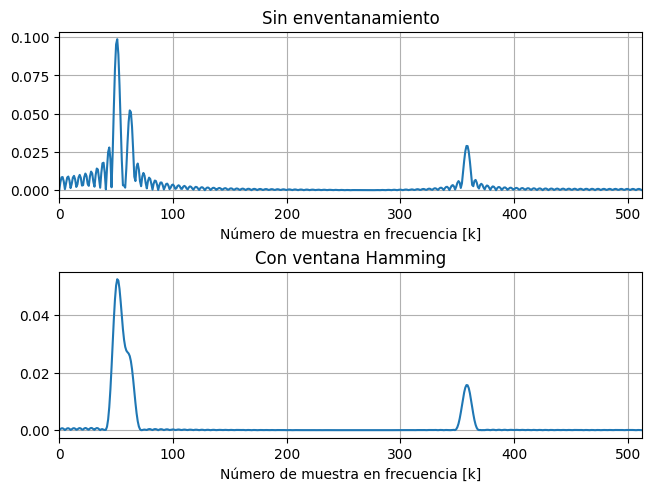

In [1]:
#Ejemplo 7.1. Efecto de derramamiento en el cálculo del espectro
#
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
from scipy.fft import fft

#Crea la señal de entrada
Nx = 200
n = np.arange(0,Nx) 
x = np.sin( n*0.1*np.pi ) + 0.5*np.sin( n*0.12*np.pi ) + 0.3*np.sin( n*0.7*np.pi )

#Calcula la FFT de x (Sin enventanamiento - Completando con ceros)
N = 1024
Xk_rect = fft(x, N)/N

#Calcula la FFT de x (Con enventanamiento - Completando con ceros)
Xk_hamming = fft(x * np.hamming(len(x)), N)/N

#Grafica los espectros calculados
fig, axs = plt.subplots(2,1,layout='constrained')

axs[0].plot(np.abs(Xk_rect))
axs[0].set_title('Sin enventanamiento')
axs[0].set_xlabel('Número de muestra en frecuencia [k]')
axs[0].set(xlim=(0,N/2)) 
axs[0].grid()

axs[1].plot(np.abs(Xk_hamming))
axs[1].set_title('Con ventana Hamming')
axs[1].set_xlabel('Número de muestra en frecuencia [k]')
axs[1].set(xlim=(0,N/2))
axs[1].grid()
plt.show()

Idealmente se esperaría obtener en el espectro, tres deltas en las frecuencias $0.1\pi$, $0.12\pi$ y $0.7\pi$, con amplitudes $0.5$, $0.25$ y $0.15$, respectivamente. Sin embargo, al usar ventana rectangular se aprecia el efecto de derramamiento, apareciendo lóbulos laterales que sugerían erróneamente la existencia de componentes de frecuencia alrededor de las frecuencias ideales. 

Aunque estos lóbulos laterales se eliminan con ventana Hamming, se disminuye la resolución, pues los espectros se ensanchan y se pueden presentar efectos como la combinación de dos componentes de frecuencia muy cercanas. Por ejemplo, en la figura, los dos deltas que se esperarían en frecuencias $0.1\pi$ y $0.12\pi$ se mezclaron entre sí.

La amplitud de los lóbulos laterales y el ensanchamiento de las componentes de frecuencia, dependen de la ventana empleada. En la siguiente tabla se resumen las características de las diferentes ventanas y cómo estas afectan el derramamiento en frecuencia.

_Características espectrales de las ventanas_

| Ventana principal	| Nivel del lóbulo principal (dB)	| Ancho aproximado del lóbulo principal | Ancho exacto del lóbulo principal |  	
|------|------|------|------|
| Rectangular	| -13 | $\frac{4\pi}{N-1}$ | $\frac{1.81\pi}{N-1}$ |
| Hanning	    | -32 |	$\frac{8\pi}{N-1}$ | $\frac{5.01\pi}{N-1}$ |
| Hamming	    | -43 |	$\frac{8\pi}{N-1}$ | $\frac{6.27\pi}{N-1}$ |
| Kaiser	    | -A  |	$-$                | $\frac{A-8}{2.285N-1}$ |

### Para Reflexionar

En un sistema de instrumentación se empleó la transformada rápida de Fourier (FFT) para calcular el espectro de una señal periódica a partir del cual se hacen mediciones de las frecuencias de los armónicos. Para dicho cálculo se hacían particiones a la señal cada N muestras.

a)	Si el sistema de instrumentación trabaja a una frecuencia de muestreo de 10kHz, ¿cuál es la resolución en frecuencia al emplear un tamaño N de 1024 muestras, 2048 y 8192 muestras? Es decir, la mínima separación en frecuencia entre dos muestras de frecuencia.

b)	Si se desea una resolución en frecuencia superior o igual a 1Hz, ¿cuántas muestras de la señal se deben tomar para hacer este cálculo? Nota: Recuerde que N debe ser potencia de 2.

c)	¿Cada cuánto tiempo el sistema de instrumentación puede actualizar el cálculo del espectro de la señal?

d)	Para la implementación del sistema se escogió un sistema digital que realiza una operación de la FFT en un tiempo de 0.2ms, con base en el costo computacional de la FFT, ¿Cuánto tiempo tarda el sistema digital en calcular una FFT completa para la longitud del punto b? Nota: Tenga en cuenta que este valor es distinto al del punto c, pues para este problema debe considerar el costo computacional O( ). ¿Con este sistema digital se puede alcanzar el tiempo calculado en c? ¿Qué habría que cambiar para que cumpliera el tiempo estipulado en el numeral c?  

## 7.4. FFT para imágenes

Como se comentó en la Sección 7.1.2, la notación vectorial de la FFT 

$$\mathbf{x}_{k}=\mathbf{W}_{N}\mathbf{x}_{n}$$

permite expresar el cálculo de la FFT en dos dimensiones, es decir, la FFT para imágenes.

Si en lugar del vector de la señal de entrada, $\mathbf{x}_{n}$, se usa una matriz, $\mathbf{X}_{n}$, que representa una imagen, la FFT aplicada a cada columna se escribirá como:

$$\mathbf{X}_{k-col}=\mathbf{W}_{N}\mathbf{X}_{n}$$

Sin embargo, en la FFT de dos dimensiones, es necesario aplicar la FFT tanto a las columnas como a las filas, por esta razón, a la matriz resultante del paso anterior, $\mathbf{X}_{k-col}$ se le debe calcular la FFT a cada fila como se muestra en la siguiente figura.

![Cálculo FFT 2D](../img/cap7_fft2d.png)

La forma de expresar la FFT a las filas consiste en transponer la matriz de la señal y aplicar el producto con la matriz $\mathbf{W}_{N}$. De esta forma la FFT 2D se expresa finalmente como:

$$\mathbf{X}_{k}= \mathbf{W}_{N} \mathbf{X}_{k-col}^{T} = \mathbf{W}_{N} (\mathbf{W}_{N}\mathbf{X}_{n})^{T} $$

En la práctica, nunca se implementa este producto de matrices pues esto conlleva un alto costo computacional, en su lugar, esta expresión indica la forma en se deben realizar los cálculos en una FFT2D. En primer lugar se calcula la FFT de cada columna de la señal de entrada y se concatenan para formar una matriz auxiliar. De esta matriz auxiliar, se calculan las FFT de sus filas, lo que produce el espectro final de la imagen. En Python, este procedimiento lo realiza internamente la función ``fft2`` como se muestra en el siguiente ejemplo. Este ejemplo emplea la biblioteca Scikit-Image, el cual debe ser instalado con ``pip install scikit-image``.

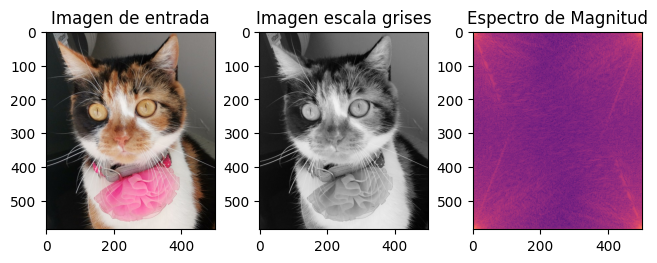

In [2]:
#Ejemplo 7.2. Transformada de Fourier de una imagen
#
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2
import skimage as img

#Carga la imagen
X = img.io.imread('manchas.jpg')

#Convierte a escala de grises
Xgray = img.color.rgb2gray(X) 

#Clacula la FFT 2D
Xk = fft2(Xgray)

#Grafica el resultado
fig, axs = plt.subplots(1,3,layout='constrained')

axs[0].imshow(X)
axs[0].set_title('Imagen de entrada')

axs[1].imshow(Xgray, cmap=plt.get_cmap('gray'))
axs[1].set_title('Imagen escala grises')

axs[2].imshow(np.log10(np.abs(Xk)), cmap=plt.get_cmap('magma'))
axs[2].set_title('Espectro de Magnitud')
plt.show()

En el espectro de una señal unidimensional, cada componente de frecuencia, o delta de frecuencia, indica la magnitud y fase de una señal senoidal en el tiempo de frecuencia $f$, por lo cual, la señal original se reconstruye sumando señales senoidales en el tiempo que se ponderan según el espectro de magnitud y se desplazan, según el espectro de fase. 

En el caso del espectro de una señal bidimensional, esta interpretación es similar, salvo que cada punto (o delta) en el espectro 2D representa la magnitud y fase que tiene una onda plana cuya dirección depende de la posición $(k,l)$ del pixel de frecuencia. Por lo cual, una imagen es la superposición de múltiples ondas planas que interfieren entre sí. 

Lo anterior se entiende mejor generando imágenes sintéticas donde se crea un espectro en el que solo un pixel es 1 y el resto es 0. En el siguiente ejemplo, se crean 4 imágenes sintéticas para los espectros 

$$X_{1}[k,l]=\begin{cases}
1 & k=3,l=0\\
0 & c.c
\end{cases}$$

$$X_{2}[k,l]=\begin{cases}
1 & k=0,l=3\\
0 & c.c
\end{cases}$$

$$X_{3}[k,l]=\begin{cases}
1 & k=3,l=3\\
0 & c.c
\end{cases}$$

$$X_{4}[k,l]=\begin{cases}
1 & k=6,l=6\\
0 & c.c
\end{cases}$$

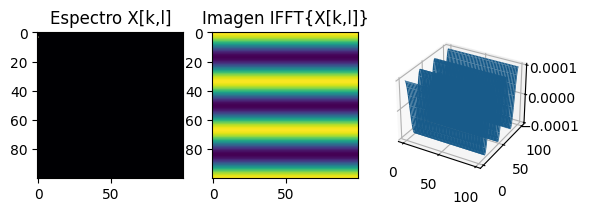

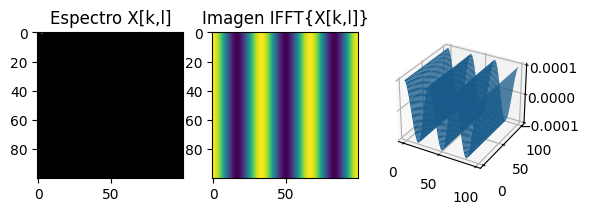

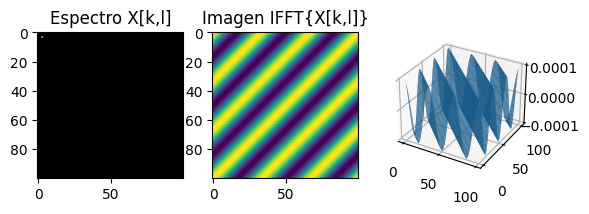

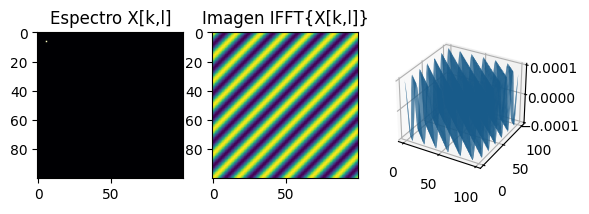

In [7]:
#Ejemplo 7.3. Transformada de Fourier de una imagen
#
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import ifft2

# Tamaños de la imagen sintética
w = 100
h = 100

def plotSyntheticImage(Xk):   
    # Calcula la imagen a partir de la transformada inversa de Fourier 2D
    Ximg = np.real(ifft2(Xk))
    # Grafica el especto de entrada
    fig = plt.figure()
    ax = fig.add_subplot(1, 3, 1)
    ax.imshow(np.log10(np.abs(Xk)), cmap=plt.get_cmap('magma'))
    ax.set_title('Espectro X[k,l]')
    # Grafica la imagen sintética
    ax = fig.add_subplot(1, 3, 2)
    ax.imshow(Ximg)
    ax.set_title('Imagen IFFT{X[k,l]}')
    # Grafica la imagen sintética en una vista 3D
    ax = fig.add_subplot(1, 3, 3, projection='3d')
    X = np.arange(w)
    Y = np.arange(h)
    X, Y = np.meshgrid(X, Y)
    ax.plot_surface(X, Y, Ximg)
    plt.show()

#Imagen sintética 1
d = 3
Xk = np.ones((w,h))*1e-6
Xk[d,0] = 1
plotSyntheticImage(Xk)

#Imagen sintética 2
d = 3
Xk = np.ones((w,h))*1e-6
Xk[0,d] = 1
plotSyntheticImage(Xk)

#Imagen sintética 3
Xk = np.ones((w,h))*1e-6
Xk[d,d] = 1
plotSyntheticImage(Xk)

#Imagen sintética 4
d = 6
Xk = np.ones((w,h))*1e-6
Xk[d,d] = 1
plotSyntheticImage(Xk)

Nótese que en cada caso, la imagen sintética es una onda plana, que se aprecia mejor en una vista 3D. La imagen resultante del primer espectro es una onda plana en dirección norte-sur, la segunda una onda plana en dirección oeste-este y la tercera una onda en dirección hacia el sur-este. La ubicación del pixel de frecuencia influye en la frecuencia de la onda como se aprecia en la cuarta imagen, donde la frecuencia es el doble.

## 7.5. Algoritmos especiales de la FFT

Cuando las señales son reales, el espectro tiene simetría, por lo cual las componentes de frecuencias negativas que se encuentran en el rango $N/2 \leq k \leq N-1$ son un espejo de las componentes en las frecuencias positivas $0 \leq k < N/2$, por lo que calcularlas demanda un desperdicio de recursos computacionales. Esta propiedad se puede explotar para aprovechar el algoritmo de una FFT compleja diseñada para un tamaño $N$ y calcular cosas como la FFT de un vector real del doble de longitud $2N$ o la FFT de dos secuencias reales de longitud $N$ de manera simultánea con una sola FFT, esto último es muy útil para el cálculo de la convolución rápida que se explorará en el siguiente capítulo.

### 7.5.1. FFT de longitud 2N

El algoritmo para calcular la FFT de una señal real de longitud $2N$ empleando el algoritmo de una FFT compleja de longitud $N$ es como sigue:

1. Se construye un vector complejo de longitud $N$ de la forma $y[n] = x[2n] + jx[2n+1]$ con $n=0,1,...,N-1$.

2. Se calcula la FFT del vector $y[n]$, obteniendo $Y[k]$.

3. Se evaluán las siguientes ecuaciones para obtener la FFT de $x[n]$ que se llamará $X[k]$: 

$$X_{r}[k] = \frac{Y_{r}[k]+Y_{r}[N-k]}{2}+cos(\pi k/N)\frac{Y_{i}[k]+Y_{i}[N-k]}{2} - sin(\pi k/N) \frac{Y_{r}[k]-Y_{r}[N-k]}{2}$$

$$X_{i}[k] = \frac{Y_{i}[k]-Y_{i}[N-k]}{2}-sin(\pi k/N)\frac{Y_{i}[k]+Y_{i}[N-k]}{2} - cos(\pi k/N) \frac{Y_{r}[k]-Y_{r}[N-k]}{2}$$

con $k=0,1,...,N-1$

### 7.5.2. Cálculo simultáneo de 2 FFT de longitud N 

El algoritmo para calcular la FFT de longitud $N$ de dos señales $h[n]$ y $g[n]$, es decir, $H[k]$ y $G[k]$ es como sigue:

1. Se construye un vector complejo de longitud $N$ de la forma $y[n]=h[n]+jg[n]$ con $n=0,1,...,N-1$.

2. Se calcula la FFT del vector $y[n]$ para obtener $Y[k]$.

3. Se evalúan las siguientes ecuaciones para obtener las FFT de $g[n]$ y $h[n]$:

$$H[k] = \frac{Y_{r}[k]+Y_{r}[N-k]+}{2} + j\frac{Y_{i}[k]-Y_{i}[N-k]+}{2}$$

$$G[k] = \frac{Y_{i}[k]+Y_{i}[N-k]+}{2} - j\frac{Y_{r}[k]-Y_{r}[N-k]+}{2}$$

con $k=0,1,...,N-1$

### Para Reflexionar

* A partir del programa de referencia https://wokwi.com/projects/421195352700619777 indicado en la Sección 7.2.2, implemente las técnicas descritas en las Secciones 7.5.1 y 7.5.2. 